# **1.** **Dependencies**

[Object detection vs Object localization](https://towardsdatascience.com/object-localization-in-overfeat-5bb2f7328b62#:~:text=The%20difference%20between%20object%20localization,the%20objects%20and%20their%20boundaries.)

In [4]:
!pip install labelme tensorflow opencv-python matplotlib albumentations
# labelme - for annotating the data
# albumentations - for augmenting the data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.3 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.2 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 85.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 20.8 MB/s eta 0:00:0000:0100:01
  Created wheel for labelme: filename=labelme-5.2.1-py3-none-any.whl size=1466744 sha256=a43b7a03e36e4c2503aea8eb05e46d1b546fbac7ea17c6a09a1ceba2d9e9f1ab
  Stored in directory: /root/.cache/pip/wheels/de/44/e2/f05944b4d1af582c7d28ab2d1372a57f63b24576f28a4aa0c3
Successfully built labelme


# **2. Image collection using OpenCV**

In [5]:
import os # file handling
import time
import uuid # uniform unique ID (used to give name to images)
import cv2 as cv # reading images

In [6]:
# run the `data_generate.py` script

In [7]:
# IMAGES_PATH = os.path.join('data','images')
# number_images = 30

# **3. Labeling using `labelme`**

In [ ]:
# run the command in terminal -->`labelme`
# try in local machine terminal

# **4. Review the dataset and create a data loader**

In [8]:
import tensorflow as tf
import json # reading the annotated labels
import numpy as np
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

### Load images to tensorflow data pipeline

In [10]:
images = tf.data.Dataset.list_files('/kaggle/input/data-set/*.jpg')

In [11]:
images.as_numpy_iterator().next()

b'/kaggle/input/data-set/11344a77-20be-11ee-99a1-346f240cc3cb.jpg'

In [12]:
def load_image(img_path): 
    '''
    function to load image from given file path
    '''
    byte_img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [13]:
images = images.map(load_image) # apply the func to each file path to retrieve the image

In [14]:
images.as_numpy_iterator().next()

array([[[162, 124, 103],
        [162, 124, 103],
        [162, 124, 103],
        ...,
        [173, 171, 174],
        [173, 171, 174],
        [173, 171, 174]],

       [[162, 124, 103],
        [162, 124, 103],
        [162, 124, 103],
        ...,
        [173, 171, 174],
        [174, 172, 175],
        [174, 172, 175]],

       [[161, 124, 105],
        [161, 124, 105],
        [162, 124, 105],
        ...,
        [173, 171, 172],
        [173, 171, 172],
        [173, 171, 172]],

       ...,

       [[117,  87,  63],
        [117,  87,  63],
        [119,  87,  66],
        ...,
        [168, 164, 163],
        [168, 164, 163],
        [167, 163, 162]],

       [[116,  88,  64],
        [115,  87,  63],
        [118,  87,  66],
        ...,
        [166, 165, 163],
        [166, 165, 163],
        [166, 165, 163]],

       [[115,  87,  63],
        [114,  86,  62],
        [116,  85,  64],
        ...,
        [166, 165, 163],
        [166, 165, 163],
        [166, 165, 163]]

In [15]:
images.as_numpy_iterator().next().shape

(480, 640, 3)

In [16]:
type(images) # a data pipeline

tensorflow.python.data.ops.map_op._MapDataset

### Visualise the images

In [17]:
image_generator = images.batch(4).as_numpy_iterator()

In [18]:
sample_images = image_generator.next()

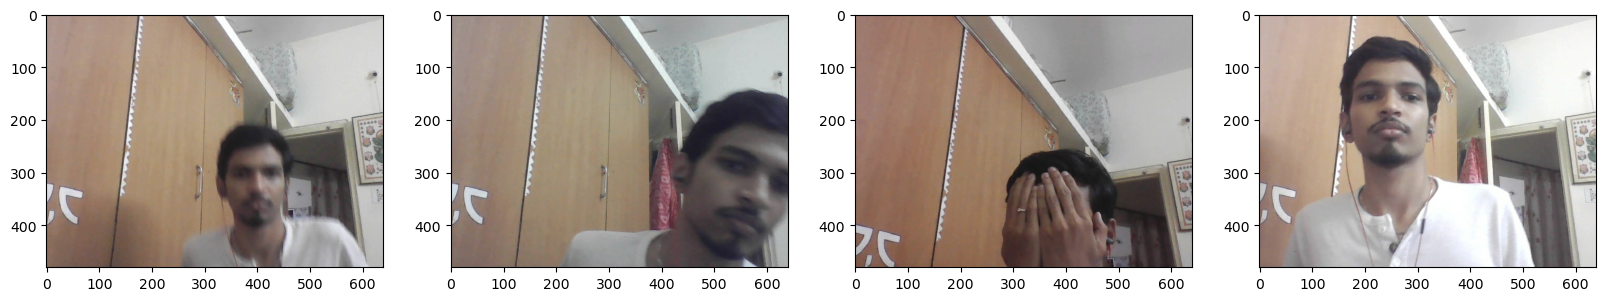

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(sample_images):
    ax[idx].imshow(image) 
plt.show()

### Creating train, val and test directories

In [20]:
os.makedirs("/kaggle/working/train/images")
os.makedirs("/kaggle/working/train/labels")

os.makedirs("/kaggle/working/val/images")
os.makedirs("/kaggle/working/val/labels")

os.makedirs("/kaggle/working/test/images")
os.makedirs("/kaggle/working/test/labels")

In [ ]:
# let us give 70% 15% 15% as train val test split

In [21]:
len(os.listdir("/kaggle/input/data-set"))

172

In [22]:
# print(0.7*172) # 120 images for train
# print(0.15*172) # 26 for for validation
# print(0.15*172) # 26 for test

In [23]:
def Intersection(lst1, lst2): # lst1 is bigger than lst2
    return set(lst1).intersection(lst2)

In [24]:
image_paths = os.listdir("/kaggle/input/data-set")

In [25]:
import random
train_img_paths = random.sample(list(image_paths), 120)

In [26]:
train_img_paths = Intersection(image_paths, train_img_paths) # we get the train images path

In [27]:
for i in train_img_paths:
    image_paths.remove(i)
len(image_paths)

52

In [28]:
val_img_paths = random.sample(list(image_paths), 26)

In [29]:
val_img_paths = Intersection(image_paths, val_img_paths) # we get the val images path

In [30]:
for i in val_img_paths:
    image_paths.remove(i)
len(image_paths)

26

In [31]:
test_img_paths = image_paths # we get the test images path

In [32]:
len(train_img_paths), len(val_img_paths), len(test_img_paths)

(120, 26, 26)

In [33]:
def checkIntersection(lst1, lst2): # lst1 is bigger than lst2
    return len(set(lst1).intersection(lst2))

In [34]:
print(checkIntersection(train_img_paths,val_img_paths))
print(checkIntersection(test_img_paths,val_img_paths))
print(checkIntersection(train_img_paths,test_img_paths))

0
0
0


In [35]:
train_img_paths = list(train_img_paths)
test_img_paths = list(test_img_paths)
val_img_paths = list(val_img_paths)

In [36]:
import shutil # copying the files

In [37]:
for img_path_ in train_img_paths:
    src_path = os.path.join('/kaggle/input/data-set/',img_path_)
    destn_path = os.path.join('/kaggle/working/train/images/',img_path_)
    shutil.copy(src_path, destn_path)
    
print("done")

done


In [38]:
for img_path_ in test_img_paths:
    src_path = os.path.join('/kaggle/input/data-set/',img_path_)
    destn_path = os.path.join('/kaggle/working/test/images/',img_path_)
    shutil.copy(src_path, destn_path)
    
print("done")

done


In [39]:
for img_path_ in val_img_paths:
    src_path = os.path.join('/kaggle/input/data-set/',img_path_)
    destn_path = os.path.join('/kaggle/working/val/images/',img_path_)
    shutil.copy(src_path, destn_path)
    
print("done")

done


### Move/Copy corresponding labels to respective directories

In [40]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('/kaggle/working/', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('/kaggle/input/data-set-labels/', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('/kaggle/working/',folder,'labels',filename)
            shutil.copy(existing_filepath, new_filepath)

print("copied labels to corresponding directories")

copied labels to corresponding directories


We have successfully setup the train, test and validation directories.
Let us move on to data augmentation

# **5. Data Augmentation using Albumentations**

let's try a sample augmentation

In [41]:
import albumentations as album

In [42]:
sample_image = cv.imread('/kaggle/working/train/images/11344a77-20be-11ee-99a1-346f240cc3cb.jpg')
sample_image.shape

(480, 640, 3)

In [43]:
augmentor = album.Compose([album.RandomCrop(width=450, height=450), # augmented image size
                         album.HorizontalFlip(p=0.5), 
                         album.RandomBrightnessContrast(p=0.2),
                         album.RandomGamma(p=0.2), 
                         album.RGBShift(p=0.2), 
                         album.VerticalFlip(p=0.5)], 
                       bbox_params=album.BboxParams(format='albumentations', # normalise the (xmin,ymin,xmax,ymax) coords
                                                  label_fields=['class_labels']))

In [53]:
sample_image = cv.imread('/kaggle/working/train/images/009be3c1-20be-11ee-a4a4-346f240cc3cb.jpg') # grab the image
with open(os.path.join('/kaggle/working/', 'train', 'labels', '009be3c1-20be-11ee-a4a4-346f240cc3cb.json'), 'r') as f:
    sample_image_bboxes = json.load(f) # grab corr annotations

In [54]:
print(sample_image_bboxes['shapes'][0]['label'])
print(sample_image_bboxes['shapes'][0]['points']) # pascal voc format of b box annotations

face
[[257.3096446700508, 126.80203045685279], [422.79187817258884, 369.9492385786802]]


In [55]:
# lets normalise the bbox coords so that we can easily define it rescaled images
coords = [0,0,0,0]
coords[0] = sample_image_bboxes['shapes'][0]['points'][0][0]
coords[1] = sample_image_bboxes['shapes'][0]['points'][0][1]
coords[2] = sample_image_bboxes['shapes'][0]['points'][1][0]
coords[3] = sample_image_bboxes['shapes'][0]['points'][1][1]
print(coords)
# [x_min, y_min, x_max, y_max]

[257.3096446700508, 126.80203045685279, 422.79187817258884, 369.9492385786802]


In [56]:
# normalise
# [x_min, y_min, x_max, y_max]
coords = list(np.divide(coords, [640,480,640,480])) # img dims of 480x640
print(coords)

[0.4020463197969543, 0.26417089678510997, 0.6606123096446701, 0.7707275803722504]


In [57]:
augmented = augmentor(image=sample_image, bboxes=[coords], class_labels=['face'])

In [58]:
augmented['bboxes'] # normalised (x_min y_min x_max y_max)

[(0.07379582628313575,
  0.2662267343485617,
  0.4415341229554427,
  0.8065538635081783)]

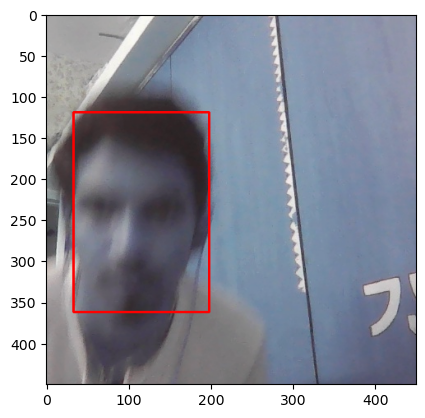

In [59]:
cv.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),# getting x_min y_min
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),# # getting x_max y_max
                    (255,0,0), 2)

plt.imshow(augmented['image'])

### Build and Run Augmentation Pipeline

In [60]:
# creating directories where augmented images will be stored
os.makedirs("/kaggle/working/aug_data/train/images")
os.makedirs("/kaggle/working/aug_data/train/labels")

os.makedirs("/kaggle/working/aug_data/val/images")
os.makedirs("/kaggle/working/aug_data/val/labels")

os.makedirs("/kaggle/working/aug_data/test/images")
os.makedirs("/kaggle/working/aug_data/test/labels")

In [61]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('/kaggle/working/', partition, 'images')):
        img = cv.imread(os.path.join('/kaggle/working/', partition, 'images', image)) # reading image in a partition

        coords = [0,0,0.00001,0.00001] # default coords for images with no annotation (no face detected)
        label_path = os.path.join('/kaggle/working/', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path): # if we find a label for the image (image was annotated)
            with open(label_path, 'r') as f:
                label = json.load(f)

            # getting the bounding box coordinates
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480])) # convert to albumentations format

        try: 
            for x in range(60): # 60 augmented images for each image passed
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv.imwrite(os.path.join('/kaggle/working/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {} # a dict for each augmented image to store the augmented properties
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: # if no bbox found for the image
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                # adding corr labels for the augmented images
                with open(os.path.join('/kaggle/working/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e) # print the error, rather than just stopping the cell execution

x_max is less than or equal to x_min for bbox [0.22041560913705585, 0.5465313028764807, 0.011024746192893398, 0.981175972927242, 'face'].
x_max is less than or equal to x_min for bbox [0.3600095177664975, 0.3191624365482234, 0.006265862944162426, 0.9674280879864637, 'face'].


Now, loading augmented data to the tensorflow dataset

In [62]:
def load_data_to_tensorflow_dataset(folder):
    '''
    loads data as tensorflow dataset when 'folder' of data is passed
    '''
    augdata_images = tf.data.Dataset.list_files(f'/kaggle/working/aug_data/{folder}/images/*.jpg', shuffle=False) # not shuffling, else labels will get messed up
    augdata_images = augdata_images.map(load_image)
    augdata_images = augdata_images.map(lambda x: tf.image.resize(x, (120,120)))
    augdata_images = augdata_images.map(lambda x: x/255)
    print(f'{folder} data done')
    return augdata_images

In [63]:
train_images = load_data_to_tensorflow_dataset("train")
test_images = load_data_to_tensorflow_dataset("test")
val_images = load_data_to_tensorflow_dataset("val")

train data done
test data done
val data done


In [ ]:
# train_images.as_numpy_iterator().next()

# **6. Combine the data with corresponding labels**

In [64]:
def load_labels(label_path):
    '''
    loads labels upon passing their path
    '''
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [65]:
def load_labels_to_tensorflow_dataset(folder):
    '''
    loads data labels to tensorflow dataset when 'folder' of data labels is passed
    '''
    augdata_labels = tf.data.Dataset.list_files(f'/kaggle/working/aug_data/{folder}/labels/*.json', shuffle=False) 
    # https://www.tensorflow.org/api_docs/python/tf/py_function
    augdata_labels = augdata_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
    print(f'{folder} labels done')
    return augdata_labels

In [66]:
train_labels = load_labels_to_tensorflow_dataset("train")
test_labels = load_labels_to_tensorflow_dataset("test")
val_labels = load_labels_to_tensorflow_dataset("val")

train labels done
test labels done
val labels done


In [67]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(7140, 7140, 1560, 1560, 1500, 1500)

Let's club the images and corr labels together to make the final dataset

In [68]:
def combine_images_and_labels(images, labels, shuffle_buffer_size, batch_size, prefetch_size):
    '''
    pairs the image and it's corresponding label in final dataset
    '''
    dataset = tf.data.Dataset.zip((images, labels)) # zipping the images with their labels
    dataset = dataset.shuffle(shuffle_buffer_size) # randomshuffling,  shuffle_buffer_size >= dataset size
    dataset = dataset.batch(batch_size) # batching the data
    dataset = dataset.prefetch(prefetch_size) # preparing prefetch_size number of batches while current batch is processing
    print('data combined')
    return dataset

In [69]:
train = combine_images_and_labels(train_images, train_labels, shuffle_buffer_size=7500, batch_size=8, prefetch_size=4)
test = combine_images_and_labels(test_images, test_labels, shuffle_buffer_size=1600, batch_size=8, prefetch_size=4)
val = combine_images_and_labels(val_images, val_labels, shuffle_buffer_size=1600, batch_size=8, prefetch_size=4)

data combined
data combined
data combined


In [70]:
data_sample = train.as_numpy_iterator()

In [71]:
curr_batch = data_sample.next()

In [ ]:
# curr_batch[0] has the images
# curr_batch[1][0] has the class label (0 or 1)
# curr_batch[1] has the bounding box coordinates

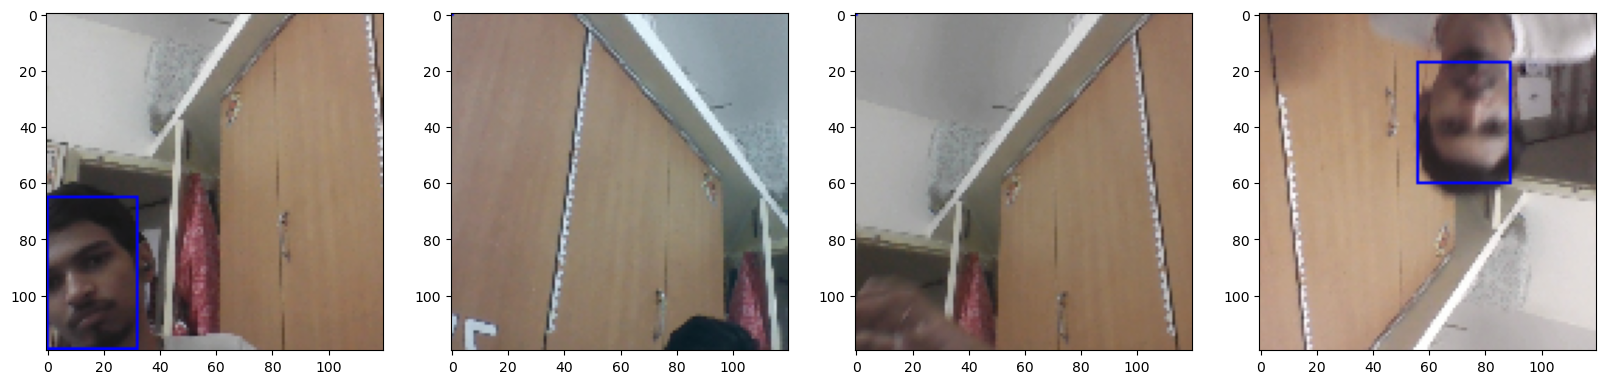

In [72]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = curr_batch[0][idx]
    sample_coords = curr_batch[1][1][idx]
    
    cv.rectangle(sample_image, 
                 # note that we have rescaled our images to 120x120
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (0,0,255), 1)

    ax[idx].imshow(sample_image)

In [73]:
curr_batch[1][1][:,:2], curr_batch[1][1][:]

(array([[0.    , 0.5444],
        [0.    , 0.    ],
        [0.    , 0.    ],
        [0.474 , 0.1484],
        [0.344 , 0.2834],
        [0.    , 0.    ],
        [0.    , 0.    ],
        [0.2986, 0.4   ]], dtype=float16),
 array([[0.    , 0.5444, 0.2693, 0.9966],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.474 , 0.1484, 0.746 , 0.5073],
        [0.344 , 0.2834, 0.653 , 0.7007],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.2986, 0.4   , 0.814 , 1.    ]], dtype=float16))

In [ ]:
# download the created dataset
# !zip -r file.zip /kaggle/working
# !ls
# from IPython.display import FileLink
# FileLink(r'file.zip')

# **7. Build Deep Learning Model**

+ we have two tasks, namely classification and regression
+ **classificaion** = predicting if face exists
+ **regression** = making the bounding box if face exists

In [163]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2 # let us use a pretrained network

In [221]:
mobile = MobileNetV2(include_top=False, weights='imagenet', input_shape=(120,120,3))

In [222]:
mobile.trainable = False

In [223]:
mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 60, 60, 32)   864         ['input_11[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 60, 60, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 60, 60, 32)   0           ['bn_Conv1[0][

In [224]:
def build_model(model):
    x = model.output # model output after passing the input image

    # Classification Model  
    fmap1 = GlobalMaxPooling2D()(x)
    class1 = Dense(512, activation='relu')(fmap1)
    dol1 = Dropout(0.5)(class1)
    class2 = Dense(1, activation='sigmoid',name='classification_output')(dol1)
    # simple binary classification of the presence of face
    
    # Bounding box model
    fmap2 = GlobalMaxPooling2D()(x)
    regress1 = Dense(512, activation='relu')(fmap2)
    dol2 = Dropout(0.5)(regress1)
    regress2 = Dense(4, activation='sigmoid',name='regression_output')(dol2)
    # using sigmoid activation, because we want 
    # outputs between 0 and 1 (the normalised bbox coordinates)
    
    facerecog = Model(inputs=model.input, outputs=[class2, regress2])
    return facerecog 

In [225]:
facerecog = build_model(mobile)

In [226]:
facerecog.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 60, 60, 32)   864         ['input_11[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 60, 60, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 60, 60, 32)   0           ['bn_Conv1[0][0]']        

### Choosing loss functions

+ [choosing a correct localization loss](https://stats.stackexchange.com/questions/354417/what-is-a-good-loss-function-for-object-localisation-and-classification-using-a)
+ [defining a loss function](https://www.geeksforgeeks.org/yolo-you-only-look-once-real-time-object-detection/)

In [227]:
classification_loss = tf.keras.losses.BinaryCrossentropy()
regression_loss = tf.keras.losses.MeanSquaredError() 

testing our loss functions

In [228]:
X, y = train.as_numpy_iterator().next()

In [229]:
classes, coords = facerecog.predict(X)

1/1 [==============================] - 1s 799ms/step


In [230]:
classes, coords

(array([[0.9977677 ],
        [0.9993678 ],
        [0.9991923 ],
        [0.9895711 ],
        [0.9962948 ],
        [0.99520516],
        [0.9719212 ],
        [0.9976254 ]], dtype=float32),
 array([[0.09147345, 0.03487914, 0.8211334 , 0.3453115 ],
        [0.54890895, 0.8026376 , 0.94987327, 0.51831037],
        [0.4657248 , 0.34720653, 0.7788235 , 0.03517953],
        [0.6664187 , 0.04994431, 0.9908371 , 0.25094303],
        [0.72953266, 0.02597983, 0.94690216, 0.41697076],
        [0.86601657, 0.01366399, 0.9886114 , 0.2231747 ],
        [0.2934014 , 0.03120236, 0.9944911 , 0.3263454 ],
        [0.85537267, 0.02907342, 0.711671  , 0.61853546]], dtype=float32))

In [231]:
print(f'classification loss is {classification_loss(y[0], classes)}')

classification loss is 3.902885913848877


In [232]:
print(f'regression loss is {regression_loss(y[1], coords)}')

regression loss is 0.31056874990463257


### Defining Optimizer and Learning rate decay

In [233]:
optimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9))
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

### Training the network

In [234]:
# subclassing our model, in order to train it using two loss functions
class FaceRecog(Model): 
    def __init__(self, facerecog,  **kwargs): 
        super().__init__(**kwargs)
        self.model = facerecog

    def compile(self, optimizer, classification_loss, regression_loss, **kwargs): # storing in the attributes for training purpose
        super().compile(**kwargs)
        self.closs = classification_loss
        self.lloss = regression_loss
        self.optimizer = optimizer
    
    def train_step(self, batch, **kwargs): 
        X, y = batch
        with tf.GradientTape() as tape: # tracks the calculations while forward pass thus helps to calculate the gradients
            classes, coords = self.model(X, training=True) # forward pass
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = 0.6*batch_localizationloss+0.6*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables) # find the gradients
        
        optimizer.apply_gradients(zip(grad, self.model.trainable_variables)) # back prop
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        
        total_loss = 0.6*batch_localizationloss+0.6*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): # call the model directly by passing training data
        return self.model(X, **kwargs)

In [235]:
model = FaceRecog(facerecog)

In [236]:
model.compile(optimizer, classification_loss, regression_loss)

In [237]:
model(X) # build the model
# calls the base model facerecog when X is passed
# call attribute of FaceRecog

[<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[0.9977677 ],
        [0.9993678 ],
        [0.9991923 ],
        [0.98957145],
        [0.9962948 ],
        [0.99520516],
        [0.97192085],
        [0.9976254 ]], dtype=float32)>,
 <tf.Tensor: shape=(8, 4), dtype=float32, numpy=
 array([[0.0914737 , 0.03487987, 0.82113415, 0.3453127 ],
        [0.54890805, 0.80263907, 0.949874  , 0.518307  ],
        [0.46571544, 0.3472076 , 0.7788229 , 0.03517981],
        [0.6664169 , 0.04994357, 0.9908372 , 0.25094256],
        [0.7295334 , 0.02598007, 0.9469012 , 0.41697684],
        [0.8660156 , 0.01366372, 0.9886114 , 0.22317939],
        [0.29339728, 0.031202  , 0.9944912 , 0.32634398],
        [0.8553732 , 0.02907395, 0.7116728 , 0.6185357 ]], dtype=float32)>]

In [238]:
model.summary()

Model: "face_recog_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_11 (Functional)       [(None, 1),               3572293   
                              (None, 4)]                         
                                                                 
Total params: 3,572,293
Trainable params: 1,314,309
Non-trainable params: 2,257,984
_________________________________________________________________


In [239]:
logdir='/kaggle/working/logs_dir'

In [240]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # saving the model callbacks

In [241]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
893/893 [==============================] - 35s 19ms/step - total_loss: 0.2347 - class_loss: 0.2986 - regress_loss: 0.0925 - val_total_loss: 0.0456 - val_class_loss: 0.0186 - val_regress_loss: 0.0575
Epoch 2/15
893/893 [==============================] - 30s 18ms/step - total_loss: 0.1135 - class_loss: 0.1471 - regress_loss: 0.0420 - val_total_loss: 0.0178 - val_class_loss: 0.0018 - val_regress_loss: 0.0279
Epoch 3/15
893/893 [==============================] - 29s 17ms/step - total_loss: 0.0842 - class_loss: 0.1105 - regress_loss: 0.0298 - val_total_loss: 0.0114 - val_class_loss: 0.0072 - val_regress_loss: 0.0117
Epoch 4/15
893/893 [==============================] - 28s 17ms/step - total_loss: 0.0764 - class_loss: 0.1020 - regress_loss: 0.0254 - val_total_loss: 0.0102 - val_class_loss: 0.0108 - val_regress_loss: 0.0061
Epoch 5/15
893/893 [==============================] - 28s 17ms/step - total_loss: 0.0696 - class_loss: 0.0932 - regress_loss: 0.0229 - val_total_loss: 0.0098 - 

In [248]:
# let us train for more 5 epochs
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
893/893 [==============================] - 29s 17ms/step - total_loss: 0.0299 - class_loss: 0.0392 - regress_loss: 0.0105 - val_total_loss: 0.0021 - val_class_loss: 1.9342e-05 - val_regress_loss: 0.0034
Epoch 2/5
893/893 [==============================] - 29s 16ms/step - total_loss: 0.0264 - class_loss: 0.0339 - regress_loss: 0.0102 - val_total_loss: 0.0418 - val_class_loss: 0.0636 - val_regress_loss: 0.0060
Epoch 3/5
893/893 [==============================] - 30s 18ms/step - total_loss: 0.0266 - class_loss: 0.0343 - regress_loss: 0.0100 - val_total_loss: 0.0041 - val_class_loss: 2.4346e-04 - val_regress_loss: 0.0067
Epoch 4/5
893/893 [==============================] - 30s 17ms/step - total_loss: 0.0266 - class_loss: 0.0347 - regress_loss: 0.0097 - val_total_loss: 0.0016 - val_class_loss: 9.1871e-04 - val_regress_loss: 0.0018
Epoch 5/5
893/893 [==============================] - 31s 17ms/step - total_loss: 0.0252 - class_loss: 0.0326 - regress_loss: 0.0095 - val_total_loss: 0.

visualising the performance of our model

In [242]:
hist.history

{'total_loss': [0.324710488319397,
  0.13337332010269165,
  0.13121159374713898,
  0.11376994103193283,
  0.008306283503770828,
  0.00515789445489645,
  0.008573688566684723,
  0.008206459693610668,
  0.015248917043209076,
  0.0178946815431118,
  0.002526820171624422,
  0.07804467529058456,
  0.009191366843879223,
  0.0033164515625685453,
  0.052430372685194016],
 'class_loss': [0.4489395320415497,
  0.20714032649993896,
  0.19476526975631714,
  0.18715177476406097,
  0.005501371342688799,
  0.0006671672454103827,
  0.0003334561479277909,
  0.0014849754516035318,
  0.0006611322169192135,
  0.015072165988385677,
  0.0004123545077163726,
  0.10917600989341736,
  0.001205241191200912,
  0.0012954918202012777,
  0.05275457352399826],
 'regress_loss': [0.09224461764097214,
  0.015148527920246124,
  0.023920707404613495,
  0.0024647926911711693,
  0.008342433720827103,
  0.007929323241114616,
  0.013956023380160332,
  0.012192456983029842,
  0.02475372888147831,
  0.014752303250133991,
  0.0

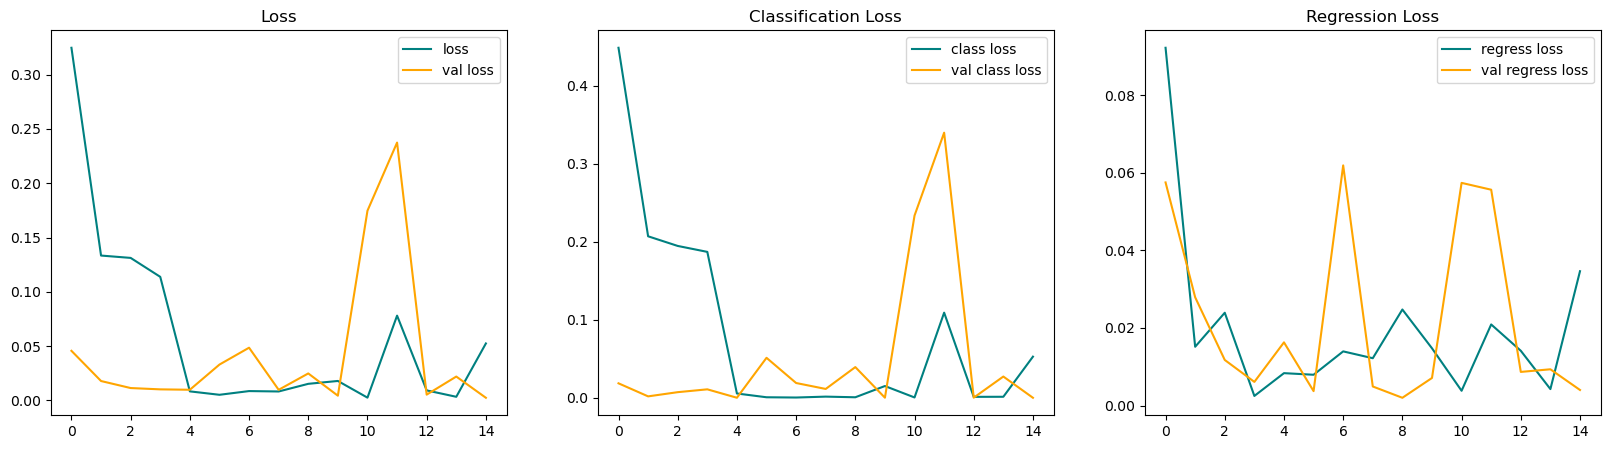

In [243]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

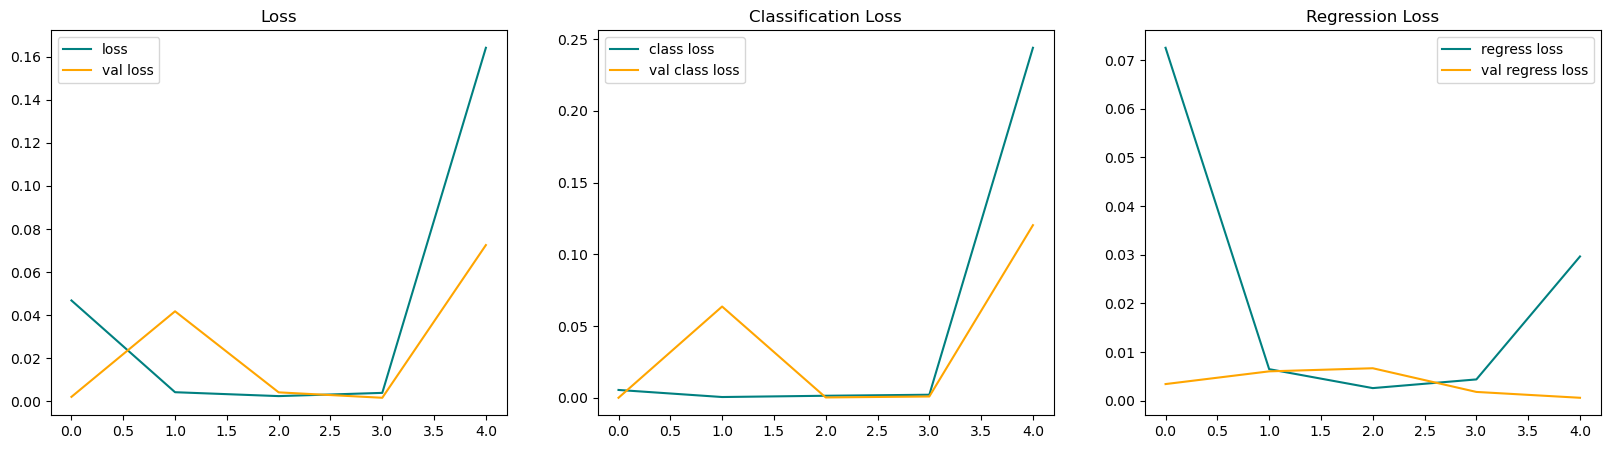

In [249]:
# next 5 epochs
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [250]:
# we stop the training now, to avoid overfitting

# **8. Test data prediction**

In [251]:
test_data = test.as_numpy_iterator()

In [255]:
test_sample = test_data.next()

In [256]:
y_pred = model.predict(test_sample[0])

1/1 [==============================] - 0s 25ms/step


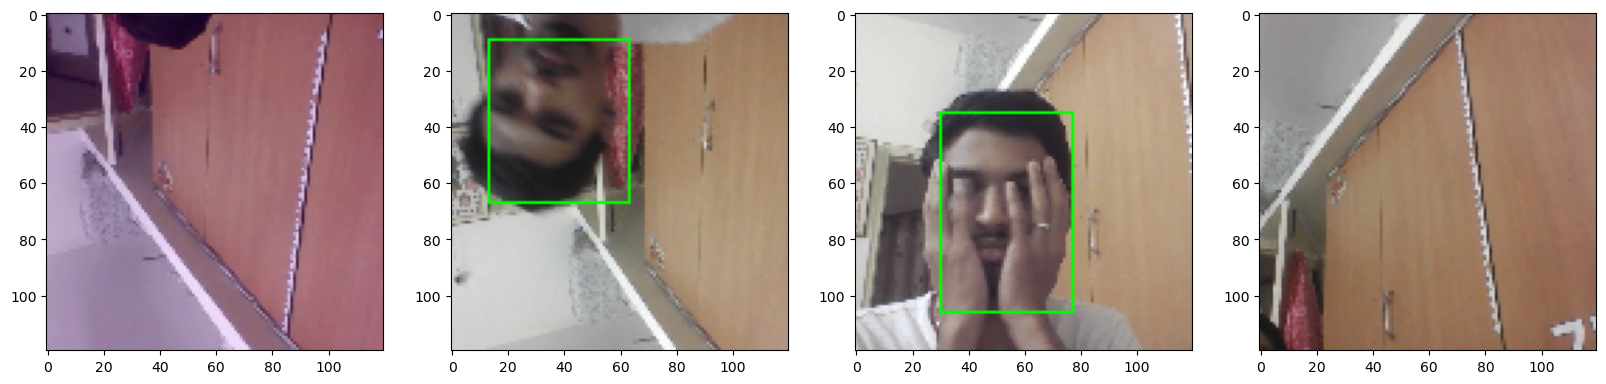

In [257]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = y_pred[1][idx]
    
    if y_pred[0][idx] > 0.5:
        cv.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (0,255,0), 1)
    
    ax[idx].imshow(sample_image)

Working pretty well

# **9. Model Saving**

In [158]:
from tensorflow.keras.models import load_model

In [258]:
facerecog.save('/kaggle/working/face_recog.h5')

In [259]:
face_detector = load_model('/kaggle/working/face_recog.h5') # model can be loaded

# **10. Realtime Prediction**

In [ ]:
# face camera detection by openCV in local environment 

In [261]:
# !zip -r file.zip /kaggle/working/logs_dir
# !ls
# from IPython.display import FileLink
# FileLink(r'file.zip')